<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/AI_b%E1%BA%A3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from os import listdir
from numpy import asarray, save
from google.colab import drive


In [ ]:
drive.mount('/content/drive')
folder = '/content/drive/MyDrive/AI_img_mix/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Prepare the dataset
def prepare_dataset(folder):
    photos, labels = [], []
    for file in listdir(folder):
        photo = load_img(folder + file, target_size=(40, 30))
        photo = img_to_array(photo)
        photos.append(photo)
        if file.startswith('dung'):
            labels.append(0)
        elif file.startswith('thinh'):
            labels.append(1)
        elif file.startswith('Tri'):
            labels.append(2)
        elif file.startswith('truc'):
            labels.append(3)
        elif file.startswith('anh'):
            labels.append(4)
    photos = asarray(photos)
    labels = asarray(labels)
    return photos, labels
print(photos.shape, labels.shape)
photos, labels = prepare_dataset(folder)

(250, 40, 30, 3) (250,)


In [ ]:
# Save the arrays for future use
save('dung_thinh_anh_tri_truc_photos.npy', photos)
save('dung_thinh_anh_tri_truc_labels.npy', labels)

In [ ]:
# Data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [ ]:
# Build the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(40, 30, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

model = create_cnn_model()

# Compile and train the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(data_augmentation.flow(photos, labels, batch_size=5), epochs=20, verbose=1)


Epoch 1/20
50/50 [==============================] - 3s 24ms/step - loss: 65.2123 - accuracy: 0.2680
Epoch 2/20
50/50 [==============================] - 1s 24ms/step - loss: 1.9775 - accuracy: 0.5240
Epoch 3/20
50/50 [==============================] - 1s 24ms/step - loss: 1.0590 - accuracy: 0.7120
Epoch 4/20
50/50 [==============================] - 1s 30ms/step - loss: 1.0073 - accuracy: 0.6880
Epoch 5/20
50/50 [==============================] - 2s 41ms/step - loss: 0.6103 - accuracy: 0.7880
Epoch 6/20
50/50 [==============================] - 1s 23ms/step - loss: 0.8408 - accuracy: 0.7640
Epoch 7/20
50/50 [==============================] - 1s 24ms/step - loss: 0.7505 - accuracy: 0.7720
Epoch 8/20
50/50 [==============================] - 1s 23ms/step - loss: 0.5023 - accuracy: 0.8200
Epoch 9/20
50/50 [==============================] - 1s 24ms/step - loss: 0.2757 - accuracy: 0.9000
Epoch 10/20
50/50 [==============================] - 1s 23ms/step - loss: 0.2565 - accuracy: 0.9240
Epoch 11

In [ ]:
# Evaluate the model
model.evaluate(photos, labels)

# Save the model
model.save('facerecognite.h5')

8/8 [==============================] - 0s 25ms/step - loss: 0.8820 - accuracy: 0.7880


1/1 [==============================] - 0s 102ms/step
[[0.1567974  0.10838947 0.11061967 0.13205206 0.10361557 0.08438333
  0.06336165 0.07972012 0.08397573 0.077085  ]]
dung


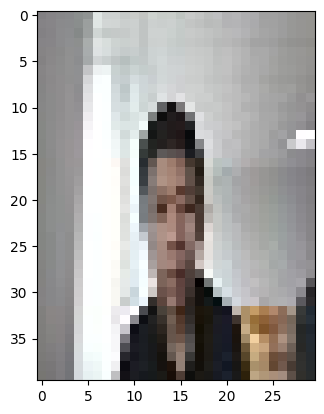

In [ ]:
# Test the model
classes = ["dung", "thinh", "truc", "Tri", "anh"]
img = load_img('/content/drive/MyDrive/AI_img_test/dung (60).jpg', target_size=(40, 30))
plt.imshow(img)
img_array = img_to_array(img)
img_array = img_array.reshape(1, 40, 30, 3)
img_array = img_array.astype('float32') / 255

y_pred = model.predict(img_array)
y_classes = np.argmax(y_pred)
print(y_pred)
print(classes[y_classes])